<a href="https://colab.research.google.com/github/arun4589/ML/blob/main/Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [56]:
stock = "AAPL"  # Apple stock
data = yf.download(stock, start="2015-01-01", end="2023-12-31")


[*********************100%***********************]  1 of 1 completed


In [57]:
data.head(2)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02,24.347174,27.3325,27.860001,26.837500,27.8475,212818400
2015-01-05,23.661268,26.5625,27.162500,26.352501,27.0725,257142000


In [53]:
data.shape

(2264, 1)

In [58]:
df=data.reset_index()['Close']

In [59]:
df

Ticker,AAPL
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500
...,...
2259,193.600006
2260,193.050003
2261,193.149994
2262,193.580002


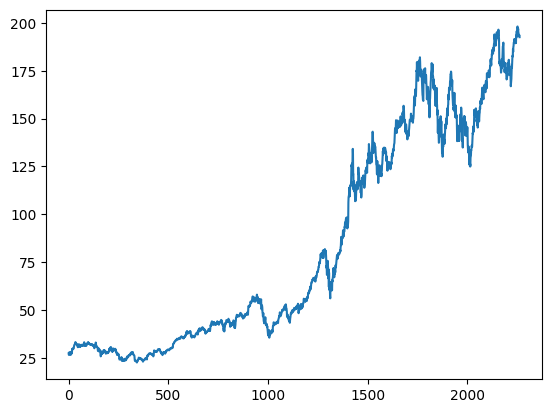

In [60]:
plt.plot(df)

In [61]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [62]:
train_size=int(len(df)*0.80)
test_size=len(df)-train_size
train_data,test_data=df[0:train_size,:],df[train_size:len(df),:1]

In [67]:
train_data.shape

(1811, 1)

In [68]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [69]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [74]:
X_train.shape,y_train.shape,X_test.shape

((1710, 100), (1710,), (352, 100))

In [75]:
x_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
x_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [76]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - loss: 0.0425 - val_loss: 0.0030
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - loss: 6.3544e-04 - val_loss: 0.0022
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 231ms/step - loss: 5.3679e-04 - val_loss: 0.0024
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - loss: 5.4467e-04 - val_loss: 0.0023
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - loss: 4.9535e-04 - val_loss: 0.0019
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 5.2589e-04 - val_loss: 0.0019
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 4.7436e-04 - val_loss: 0.0022
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 5.1257e-04 - val_loss: 0.0020
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 291ms/step - loss: 5.2388e-04 - val_loss: 0.0017
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 301ms/step - loss: 4.6124e-04 - val_loss: 0.0019
E

In [79]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [80]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [81]:
np.sqrt(mean_squared_error(y_train,train_predict))

78.50601624483505

In [82]:
np.sqrt(mean_squared_error(y_test,test_predict))

164.43103512376527

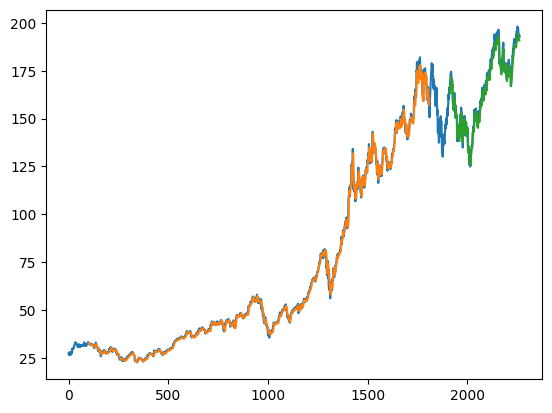

In [83]:
look_back=100
trainPredictPlot=np.empty_like(df)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=np.empty_like(df)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [84]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [86]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.9564167]
101
1 day input [0.88525851 0.88423297 0.89374737 0.88229595 0.87728248 0.86264065
 0.8654323  0.87312346 0.88104256 0.90320464 0.8762     0.88890472
 0.89790629 0.92029622 0.94040731 0.9416607  0.95071931 0.95208658
 0.91340267 0.88292264 0.88645488 0.89317761 0.87574421 0.8638371
 0.8725538  0.86839478 0.88525851 0.89152546 0.8711295  0.8622418
 0.86714139 0.87449082 0.85101841 0.84230162 0.84378295 0.84674551
 0.86121635 0.8535251  0.86070362 0.86782511 0.88252389 0.89106968
 0.88765133 0.89568439 0.90086886 0.89027207 0.88953141 0.88058677
 0.87312346 0.87095859 0.85625982 0.85694345 0.85945023 0.84611882
 0.82213359 0.82971087 0.84150402 0.84423873 0.86246974 0.88297967
 0.87773818 0.89243695 0.90719275 0.9132887  0.91055407 0.93328582
 0.92417036 0.93921095 0.9424583  0.9521436  0.95202964 0.96205667
 0.95744195 0.96125906 0.95362484 0.9525993  0.9560746  0.95020649
 0.95351088 0.9608603  0.95054831 0.97328015 0.96701328 0.9781228
 0.98632677 0.97191279 0.98062957 0.9

In [87]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [88]:
df2=df.tolist()
df2.extend(lst_output)


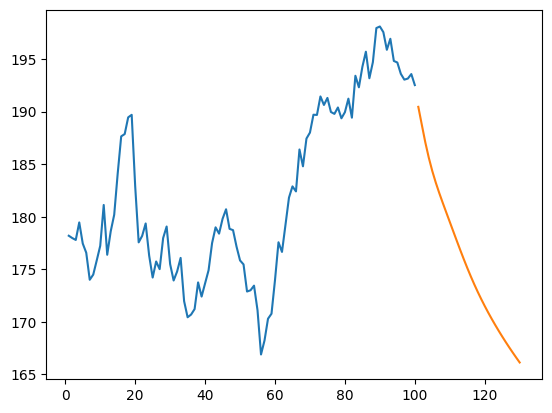

In [89]:
plt.plot(day_new,scaler.inverse_transform(df[len(df)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))